In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import numpy as np
import glob
import pickle
mpl.style.use('seaborn-talk')


In [2]:
# base_dir = '.'
# base_dir = './May-5-Take2'
# base_dir = './May12SynradExport'
# base_dir = './May12SynradExport-Take2'


# base_dir = './Corrected-Beam-Parameter/tails only all magnets'
# base_dir = './Corrected-Beam-Parameter/Full beam and magnets'


# base_dir = 'Scraper at z 350 cm'


# base_dir = 'May2020Lattice/CharlieGeometry'
# base_dir = 'May2020Lattice/UpdatedGeometryPumps'
# base_dir = 'May2020Lattice/23JulyReflectionTest'

base_dir = 'July2020Chamber/24JulyFirstRun'



In [3]:
df_flux = pd.read_excel(os.path.join(base_dir, 'Flux per facet.xlsx')  )

df_flux.set_index('Facet', inplace=True)

df_flux

,Hits,Flux (on facet),Power (on facet),Absorbed (on facet)
Facet,,,,
1,885068,259000000000000,0.03450,870608
2,677752,199000000000000,0.02600,666407
3,498205,145000000000000,0.01750,489633
4,343395,100000000000000,0.01170,337635
5,203839,59500000000000,0.00627,200287
...,...,...,...,...
14899,3083064,909000000000000,0.02760,0
14900,3802673,1120000000000000,0.03630,0
14901,4856518,1440000000000000,0.04940,0


In [4]:
# df_flux.loc[ 18985 , 'Flux (on facet)' ]

In [4]:
df_facets = pd.DataFrame()

In [5]:
filenames = glob.glob(os.path.join(base_dir, "./*.csv"))
print(len(filenames))
dfs = []

df_facets

cnt = 0;
for filename in filenames:
    cnt = cnt +1
    
    filename_base = os.path.basename(filename)
    try:
        facet_id = int(filename_base.split('.')[0]);
    except :
        print(f'Skip {filename_base}')
        continue;
        
    flux = df_flux.loc[ facet_id , 'Flux (on facet)' ]
    
    
    df = pd.read_csv(filename)
    scale = flux / df['Flux_[photon/s]'].sum();
    df['Flux_Normalized'] = df.apply(lambda x: x['Flux_[photon/s]'] * scale , axis =1)
    
    phi_average = np.arctan2(df['Pos_Y_[cm]'].mean(),df['Pos_X_[cm]'].mean())
    
    print(f'{cnt}: facet {facet_id} | <phi> = {phi_average} ->{filename} @ {flux:.2e} photon/s, scale = {scale}')
    
    df_facets = df_facets.append(
        {'Facet':facet_id, 
         'Flux': flux, 
#          'Power': df_flux.loc[ facet_id , 'Power (on facet)'],
         'Phi':phi_average}, ignore_index=True)
    
    dfs.append(df)
    

big_frame = pd.concat(dfs, ignore_index=True, sort=False)

22
1: facet 14868 | <phi> = 0.0866562893494345 ->July2020Chamber/24JulyFirstRun/./14868.csv @ 2.54e+15 photon/s, scale = 0.0009362089716291688
2: facet 14869 | <phi> = -0.08650332100975712 ->July2020Chamber/24JulyFirstRun/./14869.csv @ 2.54e+15 photon/s, scale = 0.000934952317955431
3: facet 14870 | <phi> = -0.2592285004985188 ->July2020Chamber/24JulyFirstRun/./14870.csv @ 2.29e+15 photon/s, scale = 0.0008327316234290247
4: facet 14871 | <phi> = -0.4335655450165201 ->July2020Chamber/24JulyFirstRun/./14871.csv @ 1.83e+15 photon/s, scale = 0.0006658777525228622
5: facet 14872 | <phi> = -0.6077621727166436 ->July2020Chamber/24JulyFirstRun/./14872.csv @ 1.44e+15 photon/s, scale = 0.0005253063038510624
6: facet 14886 | <phi> = -3.061572854481535 ->July2020Chamber/24JulyFirstRun/./14886.csv @ 1.21e+16 photon/s, scale = 0.004343282593487072
7: facet 14887 | <phi> = 3.0619036173335057 ->July2020Chamber/24JulyFirstRun/./14887.csv @ 1.21e+16 photon/s, scale = 0.004346737532523499
8: facet 14888 

In [6]:

df_facets.set_index('Facet', inplace=True)
df_facets.to_csv(os.path.join(base_dir, 'Facet_CheckAll.csv'))
df_facets

,Flux,Phi
Facet,,
14868.0,2.540000e+15,0.086656
14869.0,2.540000e+15,-0.086503
14870.0,2.290000e+15,-0.259229
14871.0,1.830000e+15,-0.433566
14872.0,1.440000e+15,-0.607762
14886.0,1.210000e+16,-3.061573
14887.0,1.210000e+16,3.061904
14888.0,5.430000e+15,2.892673
14889.0,2.500000e+15,2.714309


In [7]:
Phi = big_frame.apply(lambda x : np.arctan2(x['Pos_Y_[cm]'], x['Pos_X_[cm]']), axis=1)

Text(0, 0.5, 'Sum[Virtual photon]/arc Virtual photon/bin')

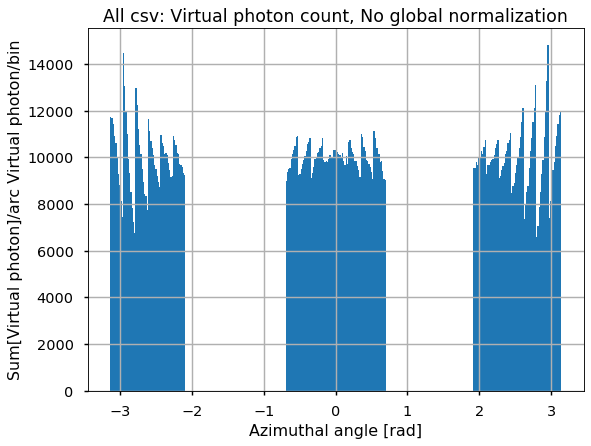

In [8]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
Phi.hist(bins=360)
plt.title('All csv: Virtual photon count, No global normalization')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Sum[Virtual photon]/arc Virtual photon/bin")

saving histogram data to July2020Chamber/24JulyFirstRun/flux_for_photon.pickle


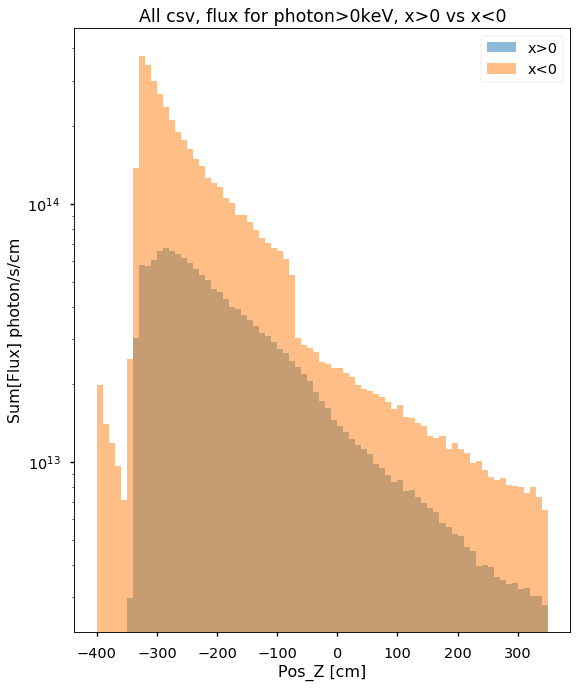

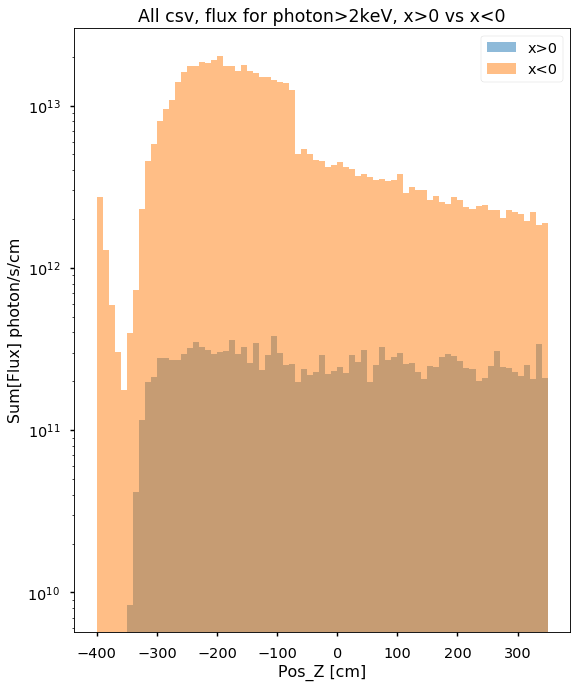

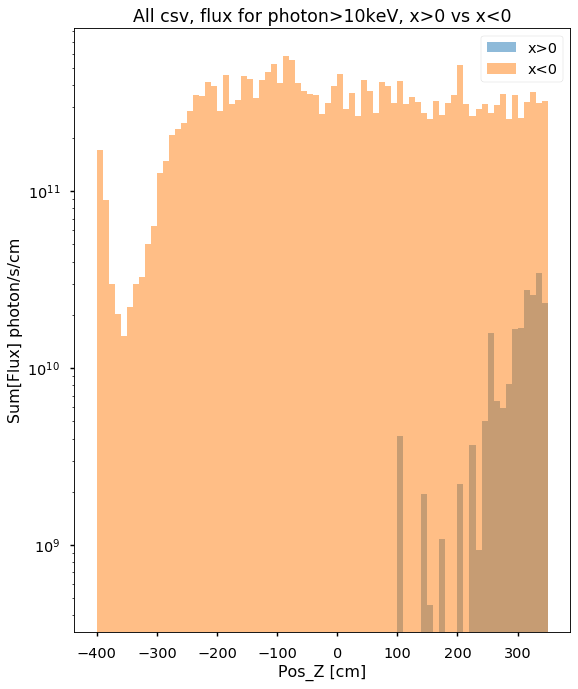

In [10]:

fid = open(f'{base_dir}/flux_for_photon.pickle', 'bw')
print(f'saving histogram data to {fid.name}')

for  ecut in [0, 2, 10]:

    plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

    hist_p = plt.hist(
        big_frame['Pos_Z_[cm]'].to_numpy(), 
        bins=np.linspace(-400,350,num=75+1),
        weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>ecut * 1e3 and x['Pos_X_[cm]']>0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
        log = True, label='x>0', alpha = 0.5, lw=3);
    hist_n = plt.hist(
        big_frame['Pos_Z_[cm]'].to_numpy(), 
        bins=np.linspace(-400,350,num=75+1),
        weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>ecut * 1e3 and x['Pos_X_[cm]']<0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
        log = True, label='x<0', alpha = 0.5, lw=3);
    plt.legend()

    plt.title(f'All csv, flux for photon>{ecut}keV, x>0 vs x<0')
    plt.xlabel("Pos_Z [cm]")
    plt.ylabel("Sum[Flux] photon/s/cm")
    
    pickle.dump((ecut, f'flux for photon>{ecut}keV', hist_p[0],hist_p[1], hist_n[0],hist_n[1]), fid)

fid.close()


Text(0, 0.5, 'Sum[Flux]/arc photon/s/rad')

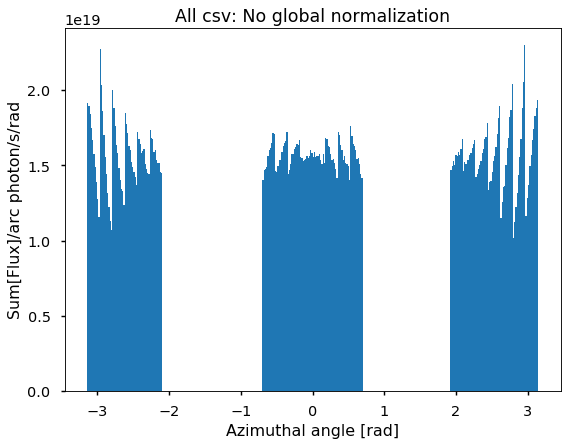

In [11]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame['Flux_[photon/s]'].to_numpy() / (2*np.pi/360) );
plt.title('All csv: No global normalization')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Sum[Flux]/arc photon/s/rad")

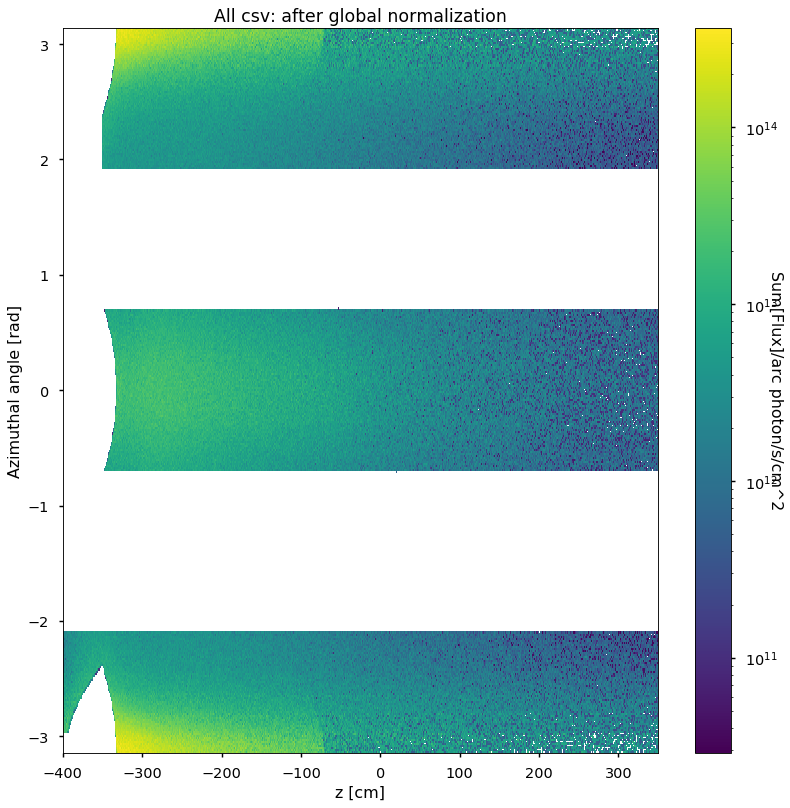

In [12]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
h = plt.hist2d(
    x = big_frame['Pos_Z_[cm]'],
    y = Phi.to_numpy(), 
    bins=[np.linspace(-400,350,num=750+1), np.linspace(-np.pi,np.pi,num=361) ] ,
    weights=big_frame['Flux_Normalized'].to_numpy() / (2*np.pi*2.9/360),
    norm=mpl.colors.LogNorm());
plt.title('All csv: after global normalization');
plt.xlabel("z [cm]");
plt.ylabel("Azimuthal angle [rad]");
cbar = plt.colorbar(h[3])
cbar.set_label('Sum[Flux]/arc photon/s/cm^2', rotation=270)


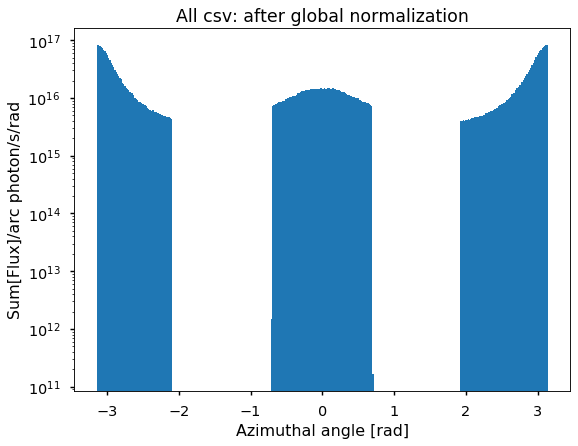

In [13]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame['Flux_Normalized'].to_numpy() / (2*np.pi/360),
    log = True );
plt.title('All csv: after global normalization');
plt.xlabel("Azimuthal angle [rad]");
plt.ylabel("Sum[Flux]/arc photon/s/rad");

(7000000000000000.0, 3e+17)

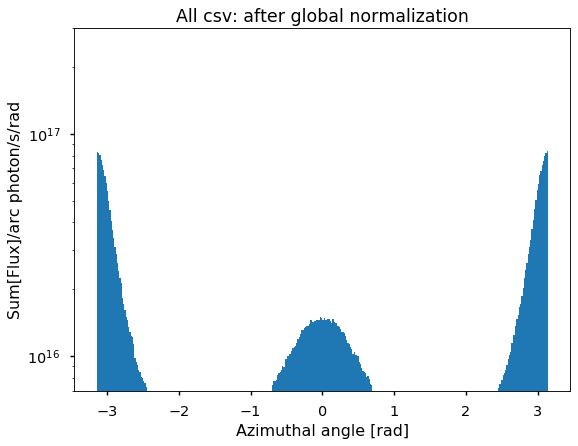

In [9]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame['Flux_Normalized'].to_numpy() / (2*np.pi/360),
    log = True );
plt.title('All csv: after global normalization');
plt.xlabel("Azimuthal angle [rad]");
plt.ylabel("Sum[Flux]/arc photon/s/rad");
plt.ylim((7e15, 3e17))

(300000000.0, 9000000000000.0)

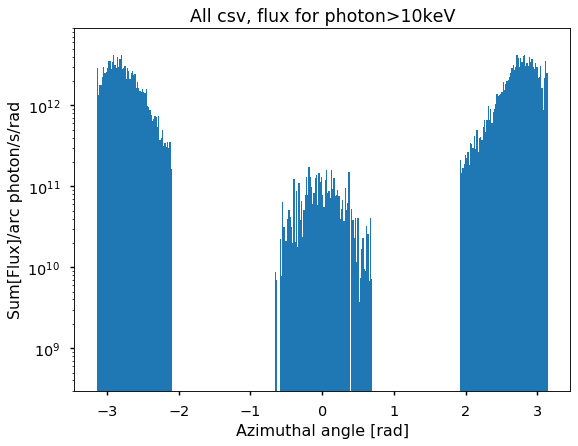

In [15]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3) * x['Flux_Normalized'], axis=1).to_numpy(),
    log = True);
plt.title('All csv, flux for photon>10keV')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Sum[Flux]/arc photon/s/rad")
plt.ylim(( 3e8, 9e12))

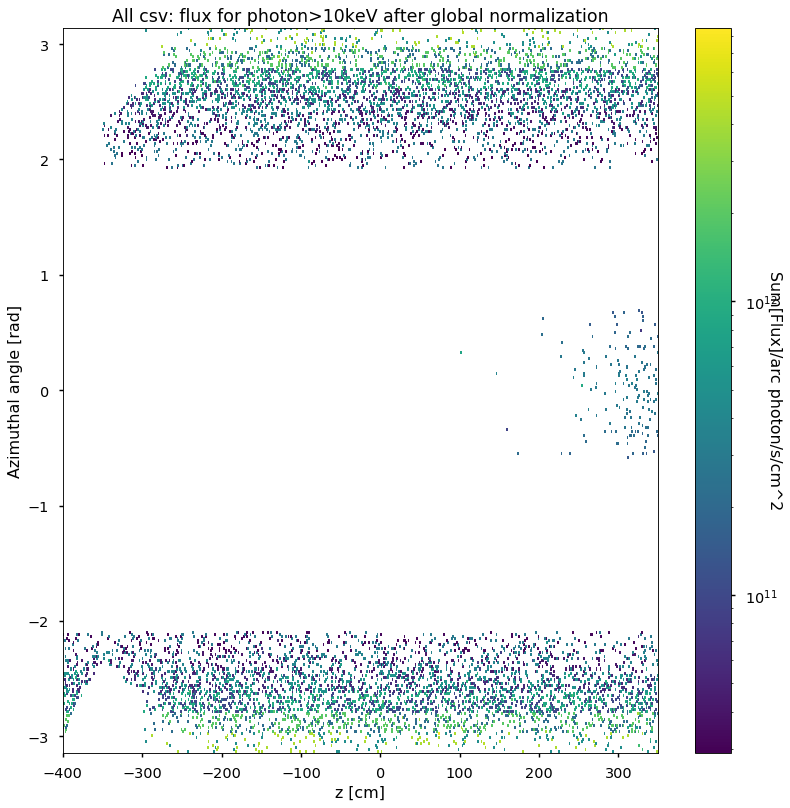

In [16]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
h = plt.hist2d(
    x = big_frame['Pos_Z_[cm]'],
    y = Phi.to_numpy(), 
    bins=[np.linspace(-400,350,num=750+1), np.linspace(-np.pi,np.pi,num=361) ] ,
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3) * x['Flux_Normalized'], axis=1).to_numpy() / (2*np.pi*2.9/360),
    norm=mpl.colors.LogNorm());
plt.title('All csv: flux for photon>10keV after global normalization');
plt.xlabel("z [cm]");
plt.ylabel("Azimuthal angle [rad]");
cbar = plt.colorbar(h[3])
cbar.set_label('Sum[Flux]/arc photon/s/cm^2', rotation=270)

Text(0, 0.5, 'Sum[Flux] photon/s/cm')

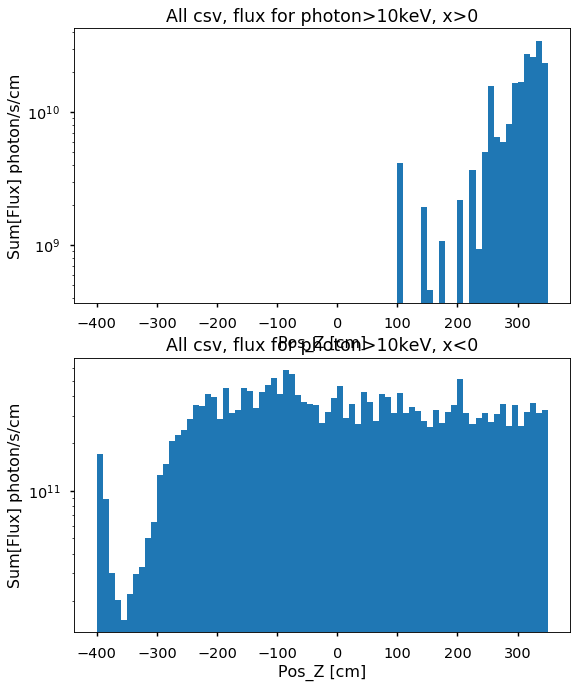

In [17]:
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']>0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
    log = True);
plt.title('All csv, flux for photon>10keV, x>0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] photon/s/cm")

plt.subplot(2, 1, 2)
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']<0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
    log = True);
plt.title('All csv, flux for photon>10keV, x<0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] photon/s/cm")

Text(0, 0.5, 'Sum[Flux] virtual photon/cm')

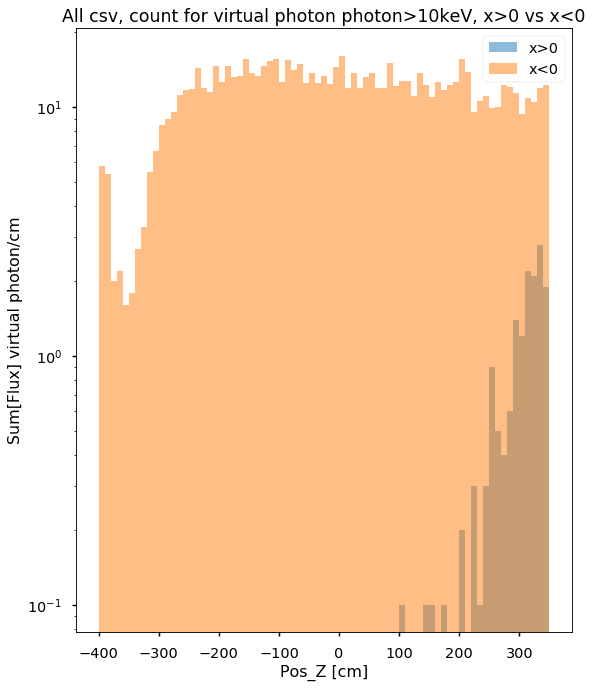

In [18]:
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']>0)  / 10, axis=1).to_numpy(),
    log = True, label='x>0', alpha = 0.5, lw=3);
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']<0)  / 10, axis=1).to_numpy(),
    log = True, label='x<0', alpha = 0.5, lw=3);
plt.legend()

plt.title('All csv, count for virtual photon photon>10keV, x>0 vs x<0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] virtual photon/cm")

Text(0, 0.5, 'Virtual photon count per bin')

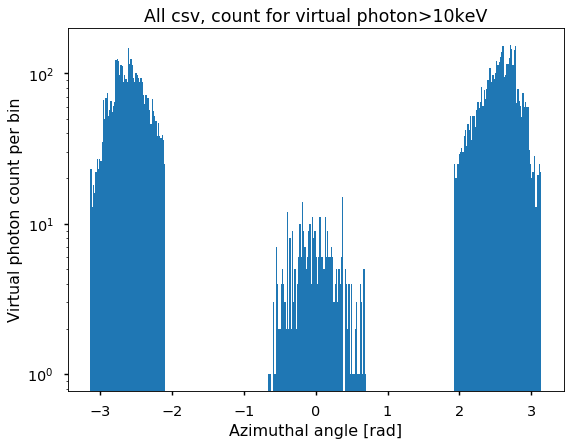

In [19]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3), axis=1).to_numpy(),
    log = True);
plt.title('All csv, count for virtual photon>10keV')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Virtual photon count per bin")

Text(0, 0.5, 'Virtual photon count per bin')

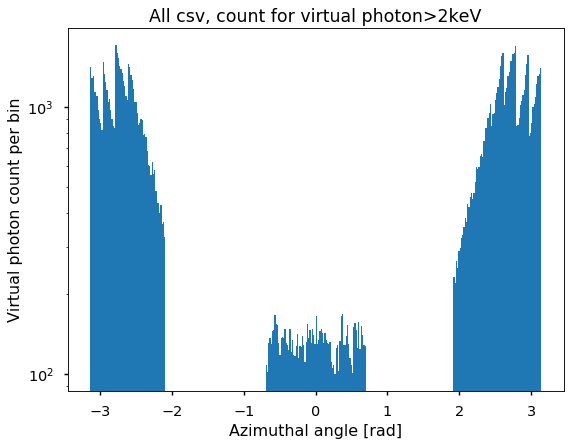

In [20]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>2e3), axis=1).to_numpy(),
    log = True);
plt.title('All csv, count for virtual photon>2keV')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Virtual photon count per bin")

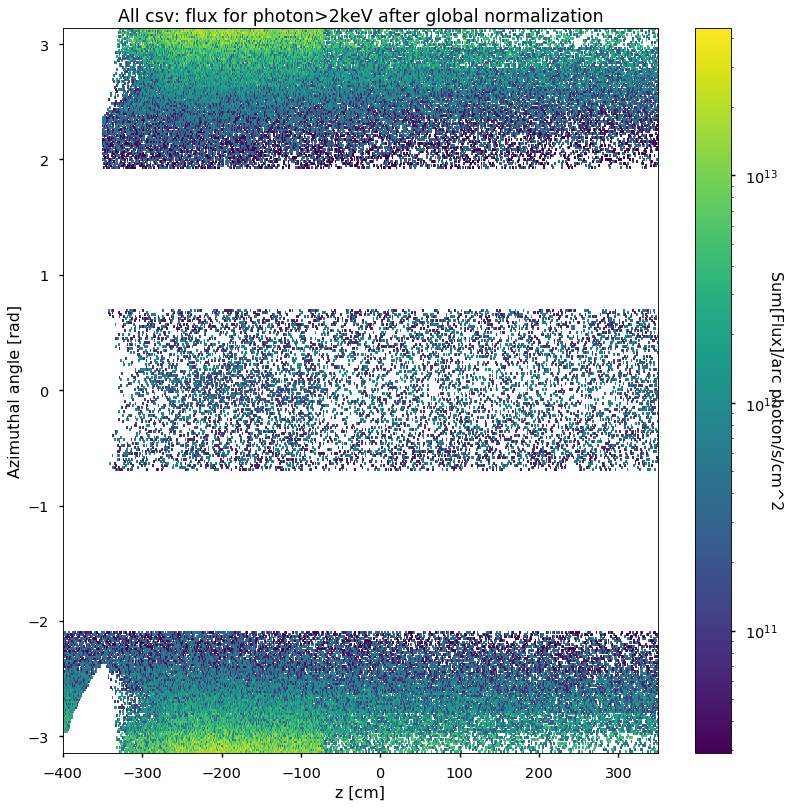

In [21]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
h = plt.hist2d(
    x = big_frame['Pos_Z_[cm]'],
    y = Phi.to_numpy(), 
    bins=[np.linspace(-400,350,num=750+1), np.linspace(-np.pi,np.pi,num=361) ] ,
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>2e3) * x['Flux_Normalized'], axis=1).to_numpy() / (2*np.pi*2.9/360),
    norm=mpl.colors.LogNorm());
plt.title('All csv: flux for photon>2keV after global normalization');
plt.xlabel("z [cm]");
plt.ylabel("Azimuthal angle [rad]");
cbar = plt.colorbar(h[3])
cbar.set_label('Sum[Flux]/arc photon/s/cm^2', rotation=270)


In [22]:
big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3), axis=1).sum()

9281

In [23]:
big_frame.apply(lambda x: int(x['Energy_[eV]']>2e3), axis=1).sum()

132285

In [24]:
# os.system('jupyter nbconvert --to html CheckAll.ipynb')
# os.system(f'mv CheckAll.html {base_dir}/')

In [10]:
# from time import sleep
# from IPython.display import display, Javascript
# import hashlib

# def save_notebook(file_path):
#     start_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
#     display(Javascript('IPython.notebook.save_checkpoint();'))
#     current_md5 = start_md5

#     while start_md5 == current_md5:
#         sleep(1)
#         current_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
        
#     print(f'saved to {file_path} {start_md5} -> {current_md5}');


# save_notebook('CheckAll.ipynb')
os.system('jupyter nbconvert --to html CheckAll.ipynb')
print(os.popen(f'mv -fv CheckAll.html \'{base_dir}/\'').read())


‘CheckAll.html’ -> ‘July2020Chamber/24JulyFirstRun/CheckAll.html’

